In [59]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [60]:
blobs = pd.read_csv("blobs.csv")

In [61]:
blobs

,x1,x2
0,5.943182,-3.500306
1,-7.225687,0.680714
2,-7.651328,2.813673
3,5.920315,-8.113558
4,-7.450757,1.236711
...,...,...
195,6.912867,-8.095758
196,-7.599752,3.051744
197,-7.329580,2.459773
198,-9.666825,3.217633


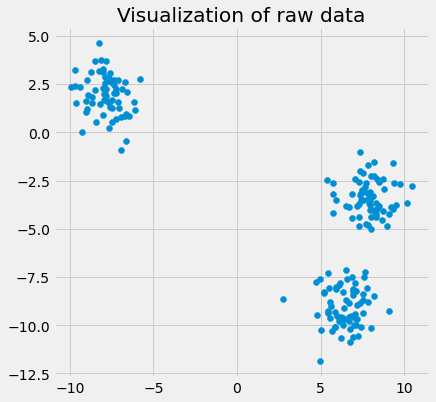

In [62]:
plt.figure(figsize=(6, 6))
plt.scatter(blobs.iloc[:, 0], blobs.iloc[:, 1])
plt.title('Visualization of raw data');

# Scaling Features

In [63]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(blobs)

In [64]:
scaled_features[:5]

array([[ 0.51943536,  0.003575  ],
       [-1.32112199,  0.91529844],
       [-1.38061205,  1.38041666],
       [ 0.51623942, -1.00240178],
       [-1.35257909,  1.03654037]])

# We call the kmeans object

In [65]:
kmeans = KMeans(
        init="random",
        n_clusters=3,
        n_init=10,
        max_iter=500,
        random_state=42
    )

In [66]:
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=500, n_clusters=3, random_state=42)

In [67]:
 # The lowest SSE value
kmeans.inertia_

12.846175723596978

In [68]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-1.40640797,  1.19106251],
       [ 0.7953202 ,  0.03119631],
       [ 0.5900966 , -1.20448176]])

In [71]:
centroids = kmeans.cluster_centers_

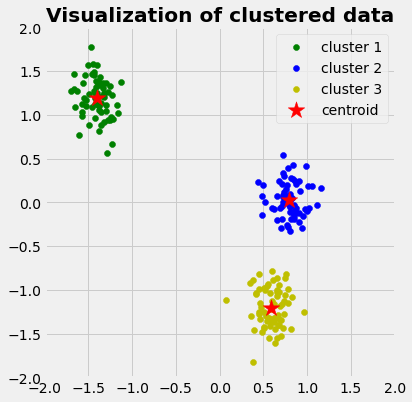

In [88]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(scaled_features[kmeans.labels_ == 0, 0], scaled_features[kmeans.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(scaled_features[kmeans.labels_ == 1, 0], scaled_features[kmeans.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(scaled_features[kmeans.labels_ == 2, 0], scaled_features[kmeans.labels_ == 2, 1],
            c='y', label='cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [89]:
kmeans.n_iter_

4

In [90]:
kmeans.labels_[:5]

array([1, 0, 0, 2, 0])

In [91]:
kmeans.labels_

array([1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0,
       0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0])

In [92]:
kmeans_kwargs = {
       "init": "random",
      "n_init": 10,
      "max_iter": 300,
       "random_state": 42,
    }

In [93]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

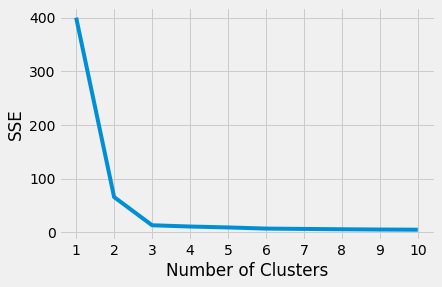

In [94]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [95]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [96]:
kl.elbow

3

# Using Circles Dataset

In [98]:
circles = pd.read_csv("circles.csv")

In [99]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(circles)

In [100]:
scaled_features[:5]

array([[-1.38624556, -0.78087363],
       [-1.22526495,  1.05054392],
       [-0.83320582,  1.35213164],
       [ 1.17722411,  0.09322849],
       [ 0.6000035 , -1.00800202]])

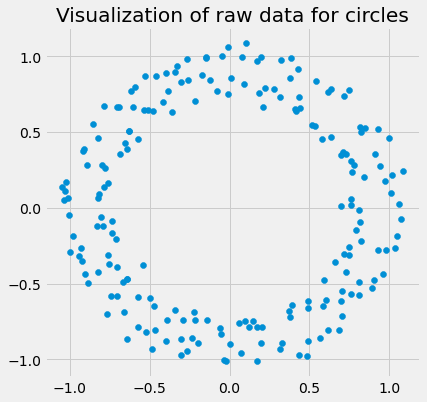

In [106]:
plt.figure(figsize=(6, 6))
plt.scatter(circles.iloc[:, 0], circles.iloc[:, 1])
plt.title('Visualization of raw data for circles');

In [107]:
kmeans = KMeans(
        init="random",
        n_clusters=2,
        n_init=10,
        max_iter=500,
        random_state=42
    )

In [108]:
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=500, n_clusters=2, random_state=42)

In [109]:
 # The lowest SSE value
kmeans.inertia_

238.46290121084715

In [110]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 0.66147301, -0.66139706],
       [-0.61059047,  0.61052036]])

In [113]:
centroids = kmeans.cluster_centers_

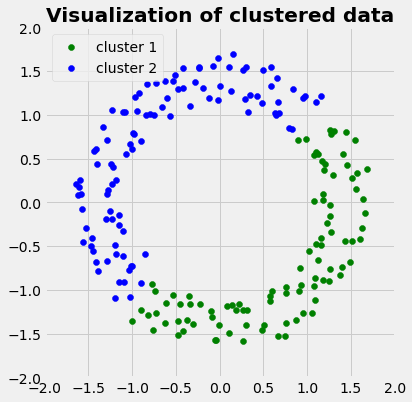

In [115]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(scaled_features[kmeans.labels_ == 0, 0], scaled_features[kmeans.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(scaled_features[kmeans.labels_ == 1, 0], scaled_features[kmeans.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [116]:
kmeans.n_iter_

3

In [117]:
kmeans.labels_[:5]

array([1, 1, 1, 0, 0])

In [119]:
kmeans_kwargs = {
       "init": "random",
      "n_init": 10,
      "max_iter": 300,
       "random_state": 42,
    }

In [120]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

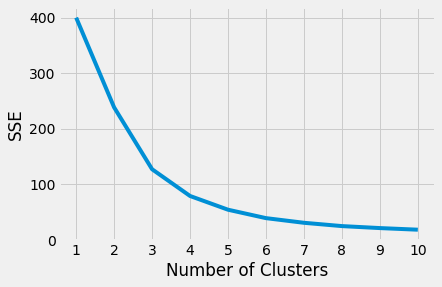

In [121]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [122]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [123]:
kl.elbow

4

# And now with the moons dataset

In [124]:
moons = pd.read_csv("moons.csv")

In [125]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(moons)

In [126]:
scaled_features[:5]

array([[-0.91306839,  1.34536491],
       [-0.18515423,  1.74115178],
       [-0.03236748,  1.34341266],
       [-0.65294253,  0.20981481],
       [ 1.4920875 , -0.29649682]])

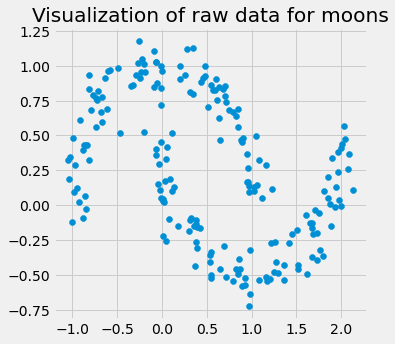

In [129]:
plt.figure(figsize=(5, 5))
plt.scatter(moons.iloc[:, 0], moons.iloc[:, 1])
plt.title('Visualization of raw data for moons');

In [130]:
kmeans = KMeans(
        init="random",
        n_clusters=2,
        n_init=10,
        max_iter=500,
        random_state=42
    )

In [131]:
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=500, n_clusters=2, random_state=42)

In [132]:
 # The lowest SSE value
kmeans.inertia_

169.6660263826116

In [133]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.7174815 ,  0.74047294],
       [ 0.77727163, -0.80217902]])

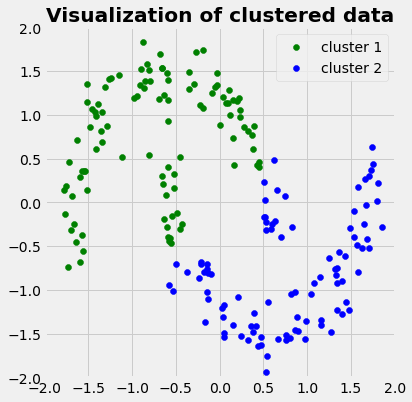

In [134]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(scaled_features[kmeans.labels_ == 0, 0], scaled_features[kmeans.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(scaled_features[kmeans.labels_ == 1, 0], scaled_features[kmeans.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [135]:
kmeans.n_iter_

5

In [136]:
kmeans.labels_[:5]

array([0, 0, 0, 0, 1])

In [137]:
kmeans_kwargs = {
       "init": "random",
      "n_init": 10,
      "max_iter": 300,
       "random_state": 42,
    }

In [138]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

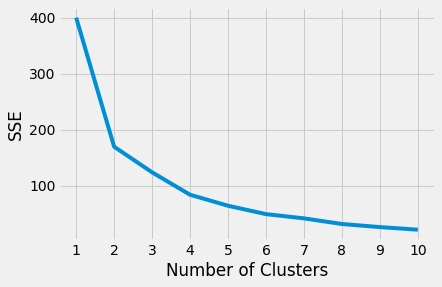

In [139]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [140]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [141]:
kl.elbow

3